In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df1 = df.iloc[:,2:]

In [5]:
df1.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df1.drop('Purchased', axis = 1), df1['Purchased'], test_size=0.3, random_state=0)

x_train.shape, x_test.shape

((280, 2), (120, 2))

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [8]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [9]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [10]:
np.round(x_test_scaled.describe(),1)

,Age,EstimatedSalary
count,120.0,120.0
mean,-0.1,-0.0
std,1.1,1.0
min,-1.9,-1.6
25%,-1.0,-0.7
50%,-0.2,-0.2
75%,0.7,0.5
max,2.2,2.3


In [11]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_scaled = LogisticRegression()

lr.fit(x_train,y_train)
lr_scaled.fit(x_train_scaled,y_train)

LogisticRegression()

In [12]:
y_pred = lr.predict(x_test)
y_pred_scaled = lr_scaled.predict(x_test_scaled)

In [13]:
from sklearn.metrics import accuracy_score

print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667


<Axes: xlabel='EstimatedSalary', ylabel='Age'>

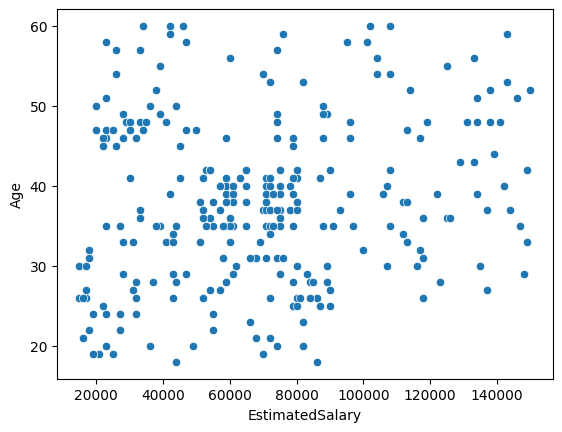

In [18]:
sns.scatterplot(data = x_train, x = 'EstimatedSalary', y = 'Age')

<Axes: xlabel='EstimatedSalary', ylabel='Age'>

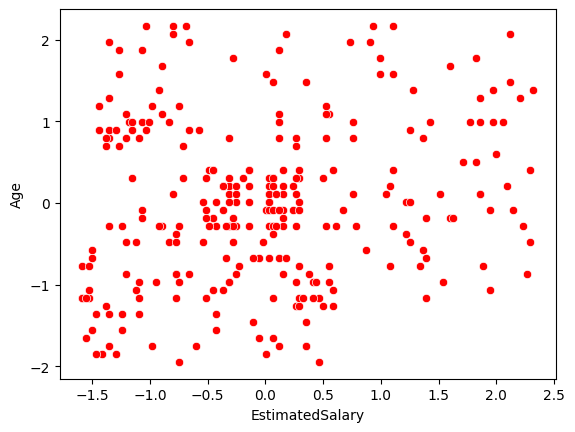

In [20]:
sns.scatterplot(data = x_train_scaled, x = 'EstimatedSalary', y = 'Age', color = 'red')

<Axes: xlabel='Age', ylabel='Density'>

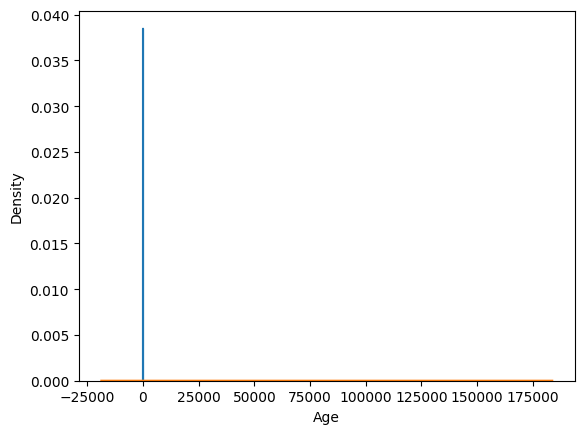

In [25]:
sns.kdeplot(x_train['Age'])
sns.kdeplot(x_train['EstimatedSalary'])

<Axes: xlabel='Age', ylabel='Density'>

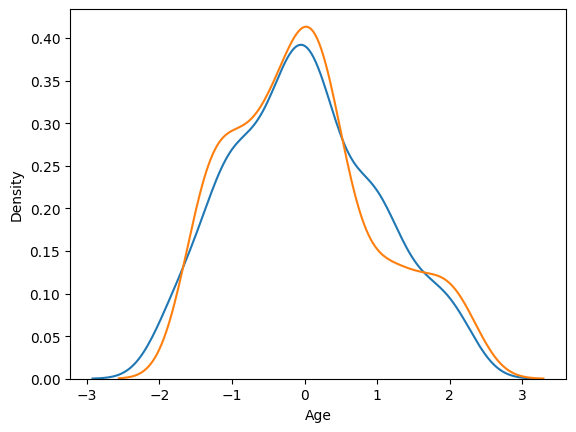

In [27]:
sns.kdeplot(x_train_scaled['Age'])
sns.kdeplot(x_train_scaled['EstimatedSalary'])

In [29]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt_scaled  = DecisionTreeClassifier()

dt.fit(x_train, y_train)
dt_scaled.fit(x_train_scaled, y_train)

DecisionTreeClassifier()

In [30]:
dt.tree_

In [31]:
y_pred = dt.predict(x_test)
y_pred_scaled = dt_scaled.predict(x_test_scaled)

In [32]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667
